# Data: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv

# Import data

In [79]:
import pandas as pd 
import seaborn as sns

In [80]:
data = pd.read_csv('bangla.csv')

In [81]:
data.tail()

,file_name,zero_crossing,spectral_centroid,spectral_rolloff,spectral_bandwidth,chroma_frequency,rmse,delta,melspectogram,tempo,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,label
1737,"Tumi Robe Nirobe, Artist - DWIJEN MUKHOPADHYA...",78516,800.797115,1436.990088,1090.389766,0.227325,0.108344,2.078194e-08,3.020211,117.453835,...,-2.615630,2.119485,-12.506942,-1.148996,0.090582,-8.694072,-6.597594,2.925687,-6.154576,rabindra
1738,TUMI SANDHYAR MEGHMALA Srikanta Acharya Rabi...,176887,1734.844686,3464.133429,1954.831684,0.271189,0.124934,5.785562e-08,4.098559,129.199219,...,1.693247,-4.076407,-2.017894,-7.419591,-0.488603,-8.690254,-7.090489,-6.530357,-5.593533,rabindra
1739,Utal Haowa Laglo Amar Gaaner Taranite Sagar S...,133326,1380.139172,2745.410904,1775.717428,0.263462,0.111411,4.204189e-08,3.147722,143.554688,...,2.487961,-3.434017,-6.099467,-6.008315,-7.483330,-2.908477,0.783345,-3.394053,-3.157621,rabindra
1740,venge mor ghorer chabi by anima roy.. album ro...,179932,1961.435018,4141.554401,2324.507425,0.261823,0.168673,3.245319e-07,7.674615,143.554688,...,1.192605,-13.142963,0.281834,-5.981567,-1.066383,0.677886,0.803132,-3.304548,4.309490,rabindra
1741,vora thak vora thak by anima roy ( 160kbps ).mp3,175244,1878.657768,3877.461439,2228.147952,0.232985,0.311113,1.531590e-07,26.447679,129.199219,...,-5.636770,-12.078487,1.692546,-6.005674,1.502304,-0.415201,2.389623,-3.135799,0.225479,rabindra


In [82]:
X = data.iloc[:,:-1]

In [83]:
X.head()

,file_name,zero_crossing,spectral_centroid,spectral_rolloff,spectral_bandwidth,chroma_frequency,rmse,delta,melspectogram,tempo,...,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19
0,(Tomake Paowa) - Hridoy Khan & Tasnim Anika F...,125424,1770.889394,3893.575094,2414.810615,0.315795,0.222552,-7.661680e-08,12.977708,172.265625,...,-5.300817,3.164991,-3.867179,5.325016,1.176338,-0.788755,-6.343288,2.488148,0.047027,7.211918
1,008. Jai Bole Jete Naire - Jewel (1980).mp3,308658,2549.349989,4986.658880,2193.617981,0.310113,0.156930,8.893313e-08,5.118271,143.554688,...,-11.745541,8.358729,-12.691169,11.393858,-6.176215,9.947330,-6.987708,7.935905,-9.452455,1.582699
2,03. Doob Habib ft Mousumi & Mosharraf Karim...,158328,2013.718396,4573.595848,2515.994413,0.301663,0.093736,1.340824e-07,2.497263,103.359375,...,-8.932615,-3.361615,-6.730814,0.184162,-4.139533,4.409801,3.190835,4.862090,-6.406590,-0.705287
3,034. Mukhe Bolo Valobashi by Muni Kis.mp3,136711,1827.495303,4215.075766,2284.762196,0.349875,0.039457,-1.908483e-08,0.421975,135.999178,...,5.370642,8.563364,-7.990767,3.611352,-4.211268,5.490051,-7.556331,1.124302,-4.306443,0.957663
4,05. Abar elo Je Shondha by Happy Akhand.mp3,238711,1715.832235,3303.949296,1587.488472,0.300132,0.142870,-5.355904e-08,4.311442,92.285156,...,-7.285621,-1.230101,-5.323076,-3.194775,-7.124155,-4.431173,-4.797250,-4.686700,-4.393025,-1.749295


# Only for this dataset, delete otherwise (Weather AUS)

X.drop('RISK_MM', axis=1, inplace=True)

In [84]:
#X.drop('RISK_MM', axis=1, inplace=True)

In [85]:
y = data.iloc[:,-1]

In [86]:
y.head()

0    adhunik
1    adhunik
2    adhunik
3    adhunik
4    adhunik
Name: label, dtype: object

# Handling missing data - Numeric type

In [87]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

In [88]:
#X.dtypes

In [89]:
numerical_cols = list(np.where((X.dtypes == np.int64) | (X.dtypes == np.float64))[0])

In [90]:
imp_mean.fit(X.iloc[:,numerical_cols])

SimpleImputer()

In [91]:
X.iloc[:,numerical_cols] = imp_mean.transform(X.iloc[:,numerical_cols])

### Handling missing string data

In [92]:
string_cols = list(np.where((X.dtypes == np.object))[0])

In [93]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [94]:
imp_mean.fit(X.iloc[:,string_cols])

SimpleImputer(strategy='most_frequent')

In [95]:
X.iloc[:,string_cols] = imp_mean.transform(X.iloc[:,string_cols])

# One Hot encoder method

In [96]:
def OneHotEncoderMethod(indices, data):
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import OneHotEncoder
    columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(),indices )], remainder='passthrough')
    return columnTransformer.fit_transform(data)

# Label encoding method

In [97]:
def LabelEncoderMethod(series):
    from sklearn import preprocessing
    le = preprocessing.LabelEncoder()
    le.fit(series)
    #print('Actual labels',le.classes_)
    #print('Encoding values',le.transform(pd.unique(series)))
    return le.transform(series) 

# Label encoding target feature

In [98]:
y = LabelEncoderMethod(y)

# Encoding selection for X

In [99]:
def EncodingSelection(X, threshold=10):
    # Step 01 : Select the string col
    string_cols = list(np.where((X.dtypes == np.object))[0])
    one_hot_encoding_indices = []
    
    # Step 02: The number of categoty is 2 and more than threshold, label encode
    for col in string_cols:
        lenght = len(pd.unique(X[X.columns[col]]))
        if lenght == 2 or lenght > threshold:
            X[X.columns[col]] = LabelEncoderMethod(X[X.columns[col]])
        else:
            one_hot_encoding_indices.append(col)
            
    # Step 03: One hot encode otherwise 
    X = OneHotEncoderMethod(one_hot_encoding_indices, X)
    return X

In [100]:
X = EncodingSelection(X)

In [101]:
X.shape

(1742, 30)

# Feature selection

In [102]:
from sklearn.feature_selection import SelectKBest, chi2

In [103]:
kbest = SelectKBest(score_func=chi2, k=10)

In [104]:
from sklearn import preprocessing
MMS = preprocessing.MinMaxScaler()

In [105]:
K_features = 5

In [106]:
x_temp = MMS.fit_transform(X)

In [107]:
x_temp = kbest.fit(x_temp,y)

In [108]:
best_features = np.argsort(x_temp.scores_)[-K_features:]

In [109]:
#best_features

In [110]:
features_to_delete = best_features = np.argsort(x_temp.scores_)[:-K_features]

In [111]:
X = np.delete(X, features_to_delete, axis=1)

In [112]:
X.shape

(1742, 5)

In [113]:
del x_temp

# Train test split

In [114]:
import numpy as np
from sklearn.model_selection import train_test_split

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [116]:
print(X_train.shape)

(1393, 5)


# Feature scaling

### Standardization: (X - mean(X)) / std(X)

### Normalization = (x - min(x)) / (max(x) - min(x))

In [117]:
from sklearn import preprocessing

In [118]:
sc = preprocessing.StandardScaler(with_mean=False)

In [119]:
sc.fit(X_train)

StandardScaler(with_mean=False)

In [120]:
X_train = sc.transform(X_train)

In [121]:
print(X_train.shape)

(1393, 5)


In [122]:
X_test = sc.transform(X_test)

In [123]:
print(X_test.shape)

(349, 5)


#### The data is ready!!

In [124]:
from sklearn.metrics import accuracy_score

# Building KNN model

In [125]:
from sklearn.neighbors import KNeighborsClassifier
knnClassifier = KNeighborsClassifier(n_neighbors=3)
knnClassifier.fit(X_train,y_train)
y_pred = knnClassifier.predict(X_test)
accuracy_score(y_pred,y_test)

0.5616045845272206

# Building Logistic regression model

In [126]:
from sklearn.linear_model import LogisticRegression
LRM = LogisticRegression(random_state=0,max_iter=200)
LRM.fit(X_train,y_train)
y_pred = LRM.predict(X_test)
accuracy_score(y_pred,y_test)

C:\Users\chaan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5415472779369628

# Building GaussianNB model

In [127]:
from sklearn.naive_bayes import GaussianNB
model_GNB = GaussianNB()
model_GNB.fit(X_train,y_train)
y_pred = model_GNB.predict(X_test)
accuracy_score(y_pred,y_test)

0.4699140401146132

# Building SVM (SVC) model

In [128]:
from sklearn.svm import SVC
model_SVC = SVC()
model_SVC.fit(X_train,y_train)
y_pred = model_SVC.predict(X_test)
accuracy_score(y_pred,y_test)

0.5845272206303725

# Building Decision tree model

In [129]:
from sklearn.tree import DecisionTreeClassifier
model_DTC = DecisionTreeClassifier()
model_DTC.fit(X_train,y_train)
y_pred = model_DTC.predict(X_test)
accuracy_score(y_pred,y_test)

0.5186246418338109

# Building Random Forest model

In [130]:
from sklearn.ensemble import RandomForestClassifier
model_RFC = RandomForestClassifier(n_estimators = 500, max_depth= 5)
model_RFC.fit(X_train,y_train)
y_pred = model_RFC.predict(X_test)
accuracy_score(y_pred,y_test)

0.5787965616045845

# Building ADABoost model

In [131]:
from sklearn.ensemble import AdaBoostClassifier
model_ABC = AdaBoostClassifier()
model_ABC.fit(X_train,y_train)
y_pred = model_ABC.predict(X_test)
accuracy_score(y_pred,y_test)

0.40974212034383956

# Building XGBoost model

In [132]:
import xgboost as xgb
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train,y_train)
y_pred = model_xgb.predict(X_test)
accuracy_score(y_pred,y_test)

C:\Users\chaan\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:21:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.6074498567335244

# Building CAP curve for models

In [147]:
def CAP_gen(model, X_test = X_test, y_test= y_test):
    pred = model.predict(X_test)
    
    _ = sorted(zip(pred, y_test), reverse = True)
    _cap = []
    for p,o in _:
        if p == o:
            _cap.append(p)
        else:
            _cap.append(o)
    y_values = np.append([0], np.cumsum(_cap))
    x_values = np.arange(0, len(y_test) + 1)
    return (x_values, y_values)

In [148]:
# Classifier object names

# knnClassifier
# LRM
# model_GNB
# model_SVC
# model_DTC
# model_RFC
# model_ABC
# model_xgb


In [149]:
total = len(y_test) 
sum_count = np.sum(y_test) 

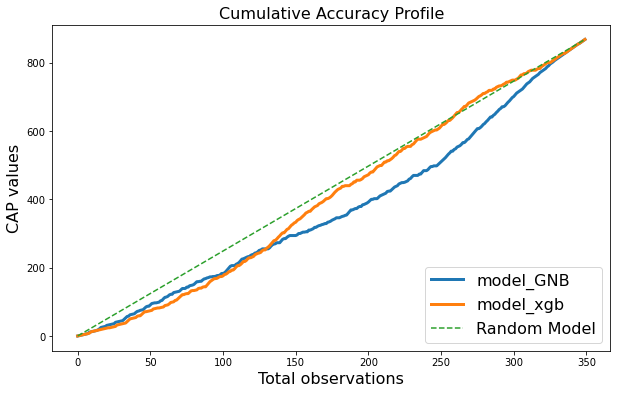

In [150]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 6)) 

_x,_y = CAP_gen(model_GNB)
plt.plot(_x, _y, linewidth = 3, label = 'model_GNB')


_x,_y = CAP_gen(model_xgb)
plt.plot(_x, _y, linewidth = 3, label = 'model_xgb')


# _x,_y = CAP_gen(model_ABC)
# plt.plot(_x, _y, linewidth = 3, label = 'model_ABC')

# _x,_y = CAP_gen(model_RFC)
# plt.plot(_x, _y, linewidth = 3, label = 'model_RFC')


plt.plot([0, total], [0, sum_count],  linestyle = '--', label = 'Random Model') 

# Plot information
plt.xlabel('Total observations', fontsize = 16)
plt.ylabel('CAP values', fontsize = 16)
plt.title('Cumulative Accuracy Profile', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)